<module 'matplotlib.pyplot' from '/home/raymond/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

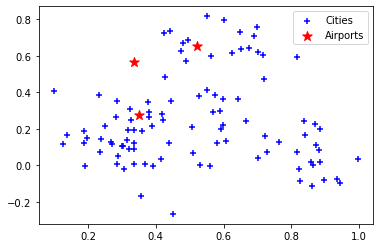

In [112]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [113]:
"""method for getting sum of squared distance between two points"""
def getDistance(point1, point2):
   return (point1[0] - point2[0])**2 + (point1[1] - point2[1])**2

"""method that takes in the airports as well as the cities 
   and returns a list containing lists of cities closest to 
   airport i (note: returned list organized by indexing of airports list
   e.g., partitionedCities[0] is the list of cities closest to airport 0) 
   O(a*c)"""
def partitionCitySet(airports, cities):
   partitionedCities = [[] for _ in range(len(airports))]

   for city in cities:
      airportDistances = []
      for airport in airports:
         airportDistances.append(getDistance(city, airport))
      partitionedCities[airportDistances.index(min(airportDistances))].append(city)

   return partitionedCities
      

# partitionedCities = partitionCitySet(airports, cities)
# def test(x,y,z):
#    print(len(x), x, end='\n\n')
#    print(len(y), y, end='\n\n')
#    print(len(z), z, end='\n\n')
#    # print(x + y + z)

# test(*partitionedCities) 

In [114]:
import copy
"""Implementation of objective function: O(abc)"""
def objectiveFun(airports, cities):
    classifiedCities = partitionCitySet(airports, cities)
    objFunStartingVal = 0

    for airport in airports:
        for cityCluster in classifiedCities:
            for city in cityCluster:
                objFunStartingVal += getDistance(airport, city)
                
    return objFunStartingVal

'''Implementation of gradient descent
   Note: the returned airports that I'm getting are all the same coordinates idk why'''
def gDescent(cities, airports, alpha, iterations):
    classifiedCities = partitionCitySet(airports, cities)
    newAirportCoordinates = []
    objectiveFunVals = []
    
    for _ in range(iterations):
        objectiveFunVals.append(objectiveFun(airports, cities))
        currentAirport = 0
        for airport in airports:
            dx = 0
            dy = 0
            
            for city in classifiedCities[currentAirport]:
                dx += 2 * (airport[0] - city[0])
                dy += 2 * (airport[1] - city[1])
            
            deltaCoordinates = (dx, dy)
            alphaTimesdxdy = tuple(map(lambda value: alpha * value, deltaCoordinates))
            newAirportLocation = tuple(map(lambda x,y: x-y, airport, alphaTimesdxdy))
            newAirportCoordinates.append(newAirportLocation)
            currentAirport += 1
            
        airports = copy.deepcopy(newAirportCoordinates)
        newAirportCoordinates.clear()

    return airports, objectiveFunVals

# print(f'objective fun before first iteration of gDescent {objectiveFun(airports, cities)}')
# newAirports, objFun = gDescent(cities, airports, 0.0069, 50)
# print(f'Airport Coordinates: {newAirports}\nnew objective fun val: {objFun}')


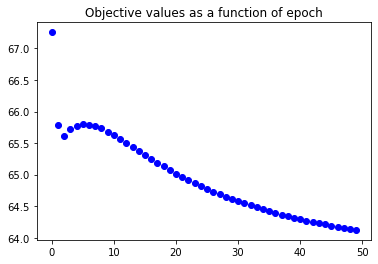

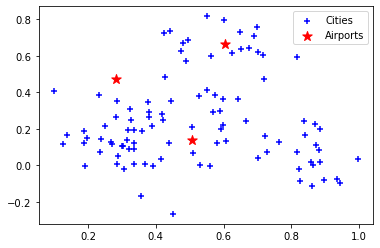

In [115]:
def main():
    iterations = 50
    alpha = 0.0069
    airportCoordinates, objectiveFunVals = gDescent(cities, airports, alpha, iterations)
    # print(f'New Coordinates of Airports {airportCoordinates}')
    # print(f"Objective function values as a function of iterations: {objectiveFunVals}")

    plt.figure(0)
    plt.title("Objective values as a function of epoch")
    plt.plot(range(iterations), objectiveFunVals, "o" ,color="blue")

    plt.figure(1)
    # plt.title("Optimized airport locations")
    zip_cities = zip(*cities)
    plt.scatter(*zip_cities, marker='+', color='b', label='Cities')
    zip_airs = zip(*airportCoordinates)
    plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
    plt.legend()
    plt
    

main()
